# Clustering of Nutrients Data

The Data consists of 7 Attributes.

The features are:
1. NAME
2. Calories
3. Protein
4. Fat
5. Calcium
6. Iron

The Target is:
1. Label

In this Notebook we explore:
1. Z-score to identify Outliers
2. Recursive Feature Elimination for identifying feature relevance
3. PCA for feature reductions

The following clustering models are used:
1. KMeans Clustering
2. Hierarchical Clustering

In [31]:
import pandas as pd
from scipy.stats import zscore
import warnings
import matplotlib
import matplotlib.pyplot as plt



matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

foods_df = pd.read_csv("../data/nutrients.csv", header=0)
columns = foods_df.columns

## Z-score
Z-score is the difference between the value and the sample mean expressed as the number of standard deviations. If the z-score is smaller than 2.5 or larger than 2.5, the value is in the 5% of smallest or largest values (2.5% of values at both ends of the distribution).

Frequency Evaluation of Calories

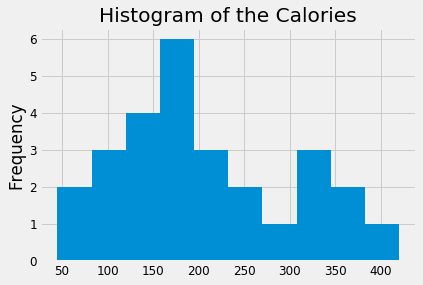

In [32]:
foods_df['Calories'].plot.hist(
  bins = 10,
  title = "Histogram of the Calories"
)

In [33]:
foods_df["calories_zscore"] = zscore(foods_df["Calories"])
foods_df["calories_is_outlier"] = foods_df["calories_zscore"].apply(lambda x: x <= -2.5 or x >= 2.5)
calories_is_outlier = foods_df["calories_is_outlier"]
# The resulting outlier from evaluation of the attribute
foods_df[calories_is_outlier]

,NAME,Calories,Protein,Fat,Calcium,Iron,Label,calories_zscore,calories_is_outlier


Frequency Evaluation of Proteins

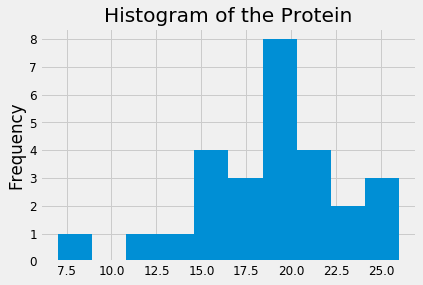

In [34]:
foods_df['Protein'].plot.hist(
  bins = 10,
  title = "Histogram of the Protein"
)

In [37]:
foods_df["protein_zscore"] = zscore(foods_df["Protein"])
foods_df["protein_is_outlier"] = foods_df["protein_zscore"].apply(lambda x: x <= -2.5 or x >= 2.5)
protein_is_outlier = foods_df["protein_is_outlier"]
# The resulting outlier from evaluation of the attribute
foods_df[protein_is_outlier]

,NAME,Calories,Protein,Fat,Calcium,Iron,Label,calories_zscore,calories_is_outlier,protein_zscore,protein_is_outlier
0,BEEF BRAISED,340,20,28,9,2.6,1,1.335059,False,0.239681,False
1,HAMBURGER,245,21,17,9,2.7,1,0.378515,False,0.479361,False
2,BEEF ROAST,420,15,39,7,2.0,1,2.140569,False,-0.958723,False
3,BEEF STEAK,375,19,32,9,2.6,1,1.687470,False,0.000000,False
4,BEEF CANNED,180,22,10,17,3.7,1,-0.275962,False,0.719042,False
5,CHICKEN BROILED,115,20,3,8,1.4,2,-0.930439,False,0.239681,False
6,CHICKEN CANNED,170,25,7,12,1.5,2,-0.376651,False,1.438084,False
7,BEEF HEART,160,26,5,14,5.9,3,-0.477340,False,1.677764,False
8,LAMB LEG ROAST,265,20,20,9,2.6,1,0.579893,False,0.239681,False
9,LAMB SHOULDER ROAST,300,18,25,9,2.3,1,0.932304,False,-0.239681,False


Frequency Evaluation of Fat

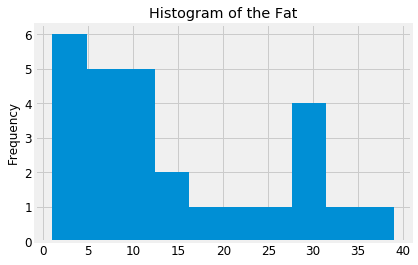

In [10]:
foods_df['Fat'].plot.hist(
  bins = 10,
  title = "Histogram of the Fat"
)

In [16]:
foods_df["fat_zscore"] = zscore(foods_df["Fat"])
foods_df["fat_is_outlier"] = foods_df["fat_zscore"].apply(lambda x: x <= -2.5 or x >= 2.5)
fat_is_outlier = foods_df["fat_is_outlier"]
# The resulting outlier from evaluation of the attribute
foods_df[fat_is_outlier]

,NAME,Calories,Protein,Fat,Calcium,Iron,Label,calories_zscore,calories_is_outlier,protein_zscore,protein_is_outlier,fat_zscore,fat_is_outlier,calcium_zscore,calcium_is_outlier,iron_zscore,iron_is_outlier


Frequency Evaluation of Calcium

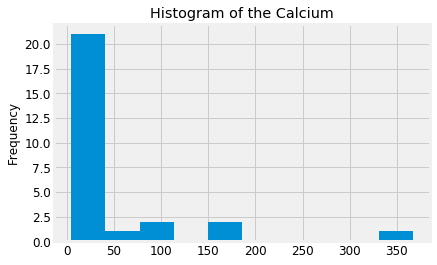

In [12]:
foods_df['Calcium'].plot.hist(
  bins = 10,
  title = "Histogram of the Calcium"
)

In [13]:
foods_df["calcium_zscore"] = zscore(foods_df["Calcium"])
foods_df["calcium_is_outlier"] = foods_df["calcium_zscore"].apply(lambda x: x <= -2.5 or x >= 2.5)
calcium_is_outlier = foods_df["calcium_is_outlier"]
# The resulting outlier from evaluation of the attribute
foods_df[calcium_is_outlier]

,NAME,Calories,Protein,Fat,Calcium,Iron,Label,calories_zscore,calories_is_outlier,protein_zscore,protein_is_outlier,fat_zscore,fat_is_outlier,calcium_zscore,calcium_is_outlier
24,SARDINES CANNED,180,22,9,367,2.5,3,-0.275962,False,0.719042,False,-0.405689,False,4.218541,True


Frequency Evaluation of Iron

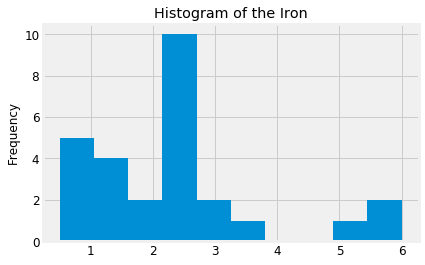

In [14]:
foods_df['Iron'].plot.hist(
  bins = 10,
  title = "Histogram of the Iron"
)

In [15]:
foods_df["iron_zscore"] = zscore(foods_df["Iron"])
foods_df["iron_is_outlier"] = foods_df["iron_zscore"].apply(lambda x: x <= -2.5 or x >= 2.5)
iron_is_outlier = foods_df["iron_is_outlier"]
# The resulting outlier from evaluation of the attribute
foods_df[iron_is_outlier]

,NAME,Calories,Protein,Fat,Calcium,Iron,Label,calories_zscore,calories_is_outlier,protein_zscore,protein_is_outlier,fat_zscore,fat_is_outlier,calcium_zscore,calcium_is_outlier,iron_zscore,iron_is_outlier
16,CLAMS RAW,70,11,1,82,6.0,3,-1.383539,False,-1.917445,False,-1.129893,False,0.496726,False,2.523394,True


## PCA (Principal Component Analysis)
Principal Component Analysis, or PCA, is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler

foods_df = pd.read_csv("../data/nutrients.csv", header=0)

# checking for missing values
# get total number of missing values in the dataset
foods_df.isna().sum()

features = ['Calories', 'Protein', 'Fat', 'Calcium', 'Iron']
# Separating out the features
X = foods_df.loc[:, features].values
# Separating out the target
y = foods_df.loc[:,['Label']].values

,principal component 1,principal component 2,Label
0,1.894907,0.318029,1
1,0.659812,-0.079563,1
2,2.936755,1.122724,1
3,2.321069,0.585663,1
4,-0.256477,0.054382,1
5,-0.932996,-0.905719,2
6,-0.185016,-1.564189,2
7,-0.699024,0.346282,3
8,0.937389,0.108904,1
9,1.409838,0.415262,1


In [75]:
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#no of features
nof_list=np.arange(1,5)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 2
Score with 2 features: 0.525951


In [76]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# Feature Selection
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 2)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[ True  True]
[1 1]


### Standardization
PCA is effected by scale so you need to scale the features in your data before applying PCA

In [ ]:
# Standardizing the features
x = StandardScaler().fit_transform(X)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, foods_df[['Label']]], axis = 1)
finalDf

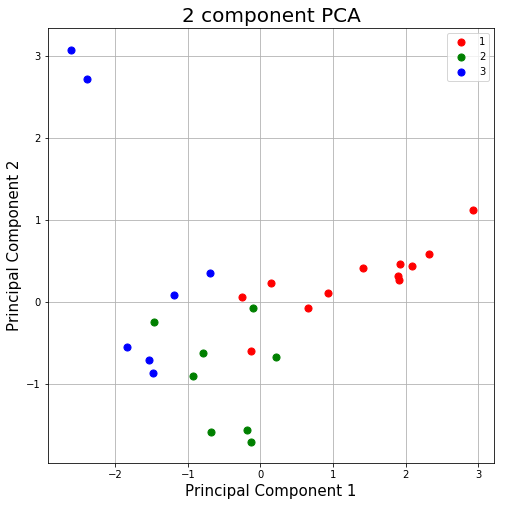

In [4]:
# plotting a scatter plot to see the 
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1, 2, 3]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Label'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
# Remove the identified outliers
principalDf = principalDf.drop([16, 17])
foods_df = foods_df.drop([16, 17])

## KMEANs Clustering

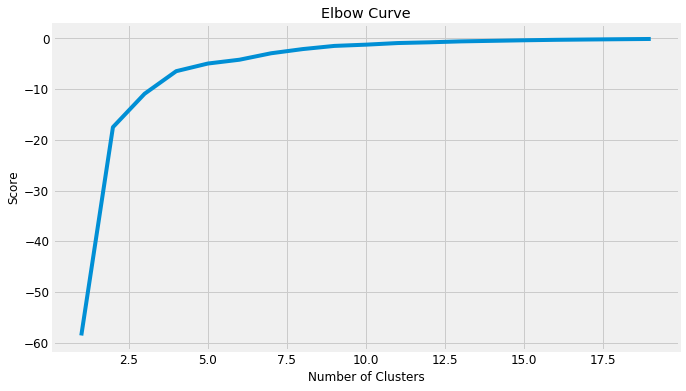

0.52


In [61]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

X = np.array(principalDf.astype(float))
y = np.array(foods_df['Label'])

n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i, max_iter=5000, algorithm = 'auto').fit(X) for i in n_cluster]
scores = [kmeans[i].score(X) for i in range(len(kmeans))]

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(n_cluster, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

kmeans = KMeans(n_clusters=3, max_iter=5000, algorithm = 'auto') # You want cluster the passenger records into 5: Each of the nutrient groups
y_kmeans = kmeans.fit(X)

correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

## Hierarchical Clustering

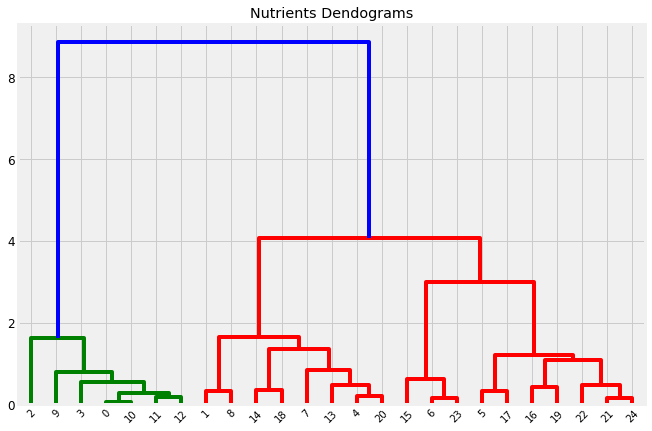

In [62]:
import matplotlib.pyplot as plt  
%matplotlib inline

import scipy.cluster.hierarchy as shc
# plot to identify clusters in the dataset
plt.figure(figsize=(10, 7))  
plt.title("Nutrients Dendograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))

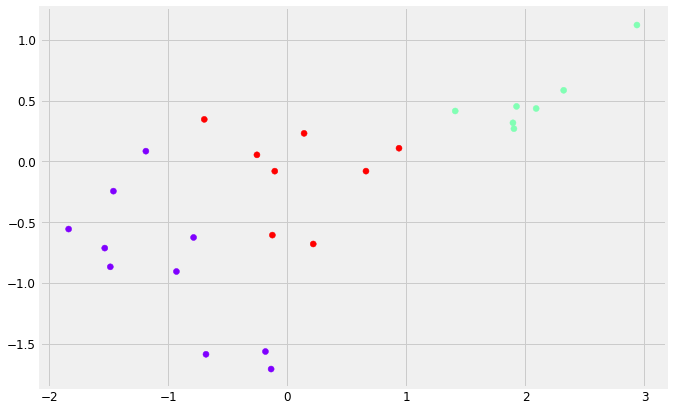

In [68]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(X)  

# plot the actual clusters 
plt.figure(figsize=(10, 7))  
plt.scatter(X[:,0], X[:,1], c=cluster.labels_, cmap='rainbow')  
